<a href="https://colab.research.google.com/github/yongzhiqu/IE_4495/blob/master/neuralNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from matplotlib import pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv1D
from numpy import genfromtxt
from numpy import math
import csv
import time
#from Successes import Equations

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# ============== Initialize important parameters ============================
p_val = 0.05     # Sparsity value     ***Change in Equations!***
epochs = 1
batch_size = 100
encoded_size = 20  # How many nodes in encoded layer
lr = .008  # Learning Rate
# ===========================================================================

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", 
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0],transpose_b=True)
        return self.activation(z + self.biases)
    

# reshaping the images so they can be used better
training_images = training_images.reshape((60000, 784))
training_images = training_images.astype('float32') / 255
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255

training_labels_cat = to_categorical(training_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)

training_labels = training_labels.astype('float32')/10
test_labels = test_labels.astype('float32')/10

In [69]:
# First way to build a model
#sequential flow model:
inputs = keras.Input(shape = (784,))

x = inputs

#Regualr neural network

dense_1 = Dense(128, activation='sigmoid', input_shape=(784,))
dense_2 = Dense(50, activation = 'sigmoid')
dense_3 = Dense(20, activation='sigmoid')
dense_4 = Dense(1, activation='sigmoid')

x_hidden1 = dense_1(x)
x_hidden2 = dense_2(x_hidden1)
x_hidden3 = dense_3(x_hidden2)
x_output = dense_4(x_hidden3)

# we instantiate our model
outputs = x_output

simple_neural_net = keras.Model(inputs=inputs, outputs=outputs)
simple_neural_net.summary()

print("\nTraining autoencoder")
simple_neural_net.compile(optimizer=keras.optimizers.Adam(lr=lr), loss = 'MSE', metrics = ['accuracy'])

print(training_images.shape)
print(training_labels.shape)
history = simple_neural_net.fit(training_images[:60000], training_labels[:60000], epochs=epochs, batch_size=batch_size)



auto_labels = simple_neural_net.predict(test_images)
auto_labels = np.array(auto_labels, dtype='float')
    


Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_121 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_122 (Dense)            (None, 50)                6450      
_________________________________________________________________
dense_123 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 21        
Total params: 107,971
Trainable params: 107,971
Non-trainable params: 0
_________________________________________________________________

Training autoencoder
(60000, 784)
(60000,)
600/600 [==============================] - 3s 4ms/step - loss: 0.0277 - ac

In [70]:
print(auto_labels[:10])
print(auto_labels.shape)
print(test_labels[:10])

[[0.70441514]
 [0.22871119]
 [0.11035672]
 [0.02653697]
 [0.42396766]
 [0.10847124]
 [0.41441792]
 [0.7900275 ]
 [0.65351117]
 [0.87733549]]
(10000, 1)
[0.7 0.2 0.1 0.  0.4 0.1 0.4 0.9 0.5 0.9]


In [71]:
# Second way to build a model
from keras import regularizers
myNeuralNet = models.Sequential([
    layers.Dense(128, activation='sigmoid', activity_regularizer=regularizers.l1(10e-6),input_shape=(784,)),
    layers.Dense(50, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid', activity_regularizer=regularizers.l1(10e-6))])
myNeuralNet.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='mse')
myNeuralNet.summary()
# layers.Activation


print("\nTraining autoencoder")
tic1 = time.time()

myNeuralNet.fit(training_images, training_labels_cat, validation_split=0.1, epochs=epochs, batch_size=batch_size)
toc1 = time.time()
print(toc1 - tic1) 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_126 (Dense)            (None, 50)                6450      
_________________________________________________________________
dense_127 (Dense)            (None, 10)                510       
Total params: 107,440
Trainable params: 107,440
Non-trainable params: 0
_________________________________________________________________

Training autoencoder
540/540 [==============================] - 3s 4ms/step - loss: 0.0595 - val_loss: 0.0083
2.8665523529052734


In [73]:
auto_labels_cat = myNeuralNet.predict(test_images)
for i in range(1, 20):
    print('pred_label = ', np.argmax(auto_labels_cat[i]))
    print('true_label = ', np.argmax(test_labels_cat[i]))

pred_label =  2
true_label =  2
pred_label =  1
true_label =  1
pred_label =  0
true_label =  0
pred_label =  4
true_label =  4
pred_label =  1
true_label =  1
pred_label =  4
true_label =  4
pred_label =  9
true_label =  9
pred_label =  5
true_label =  5
pred_label =  9
true_label =  9
pred_label =  0
true_label =  0
pred_label =  6
true_label =  6
pred_label =  9
true_label =  9
pred_label =  0
true_label =  0
pred_label =  1
true_label =  1
pred_label =  5
true_label =  5
pred_label =  9
true_label =  9
pred_label =  7
true_label =  7
pred_label =  3
true_label =  3
pred_label =  4
true_label =  4


In [74]:
# Third way to build model

model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))
x = tf.ones((20, 10))
y = model(x)
print("Number of weights after calling the model:", len(model.weights)) 
model.summary()

Number of weights after calling the model: 6
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (20, 2)                   22        
_________________________________________________________________
dense_129 (Dense)            (20, 3)                   9         
_________________________________________________________________
dense_130 (Dense)            (20, 4)                   16        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________



Training autoencoder
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_115 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_116 (Dense)            (None, 50)                6450      
_________________________________________________________________
dense_117 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_transpose_27 (DenseTra (None, 50)                1070      
_________________________________________________________________
dense_transpose_28 (DenseTra (None, 128)               6578      
_________________________________________________________________
dense_transpose_29 (DenseTra (None, 

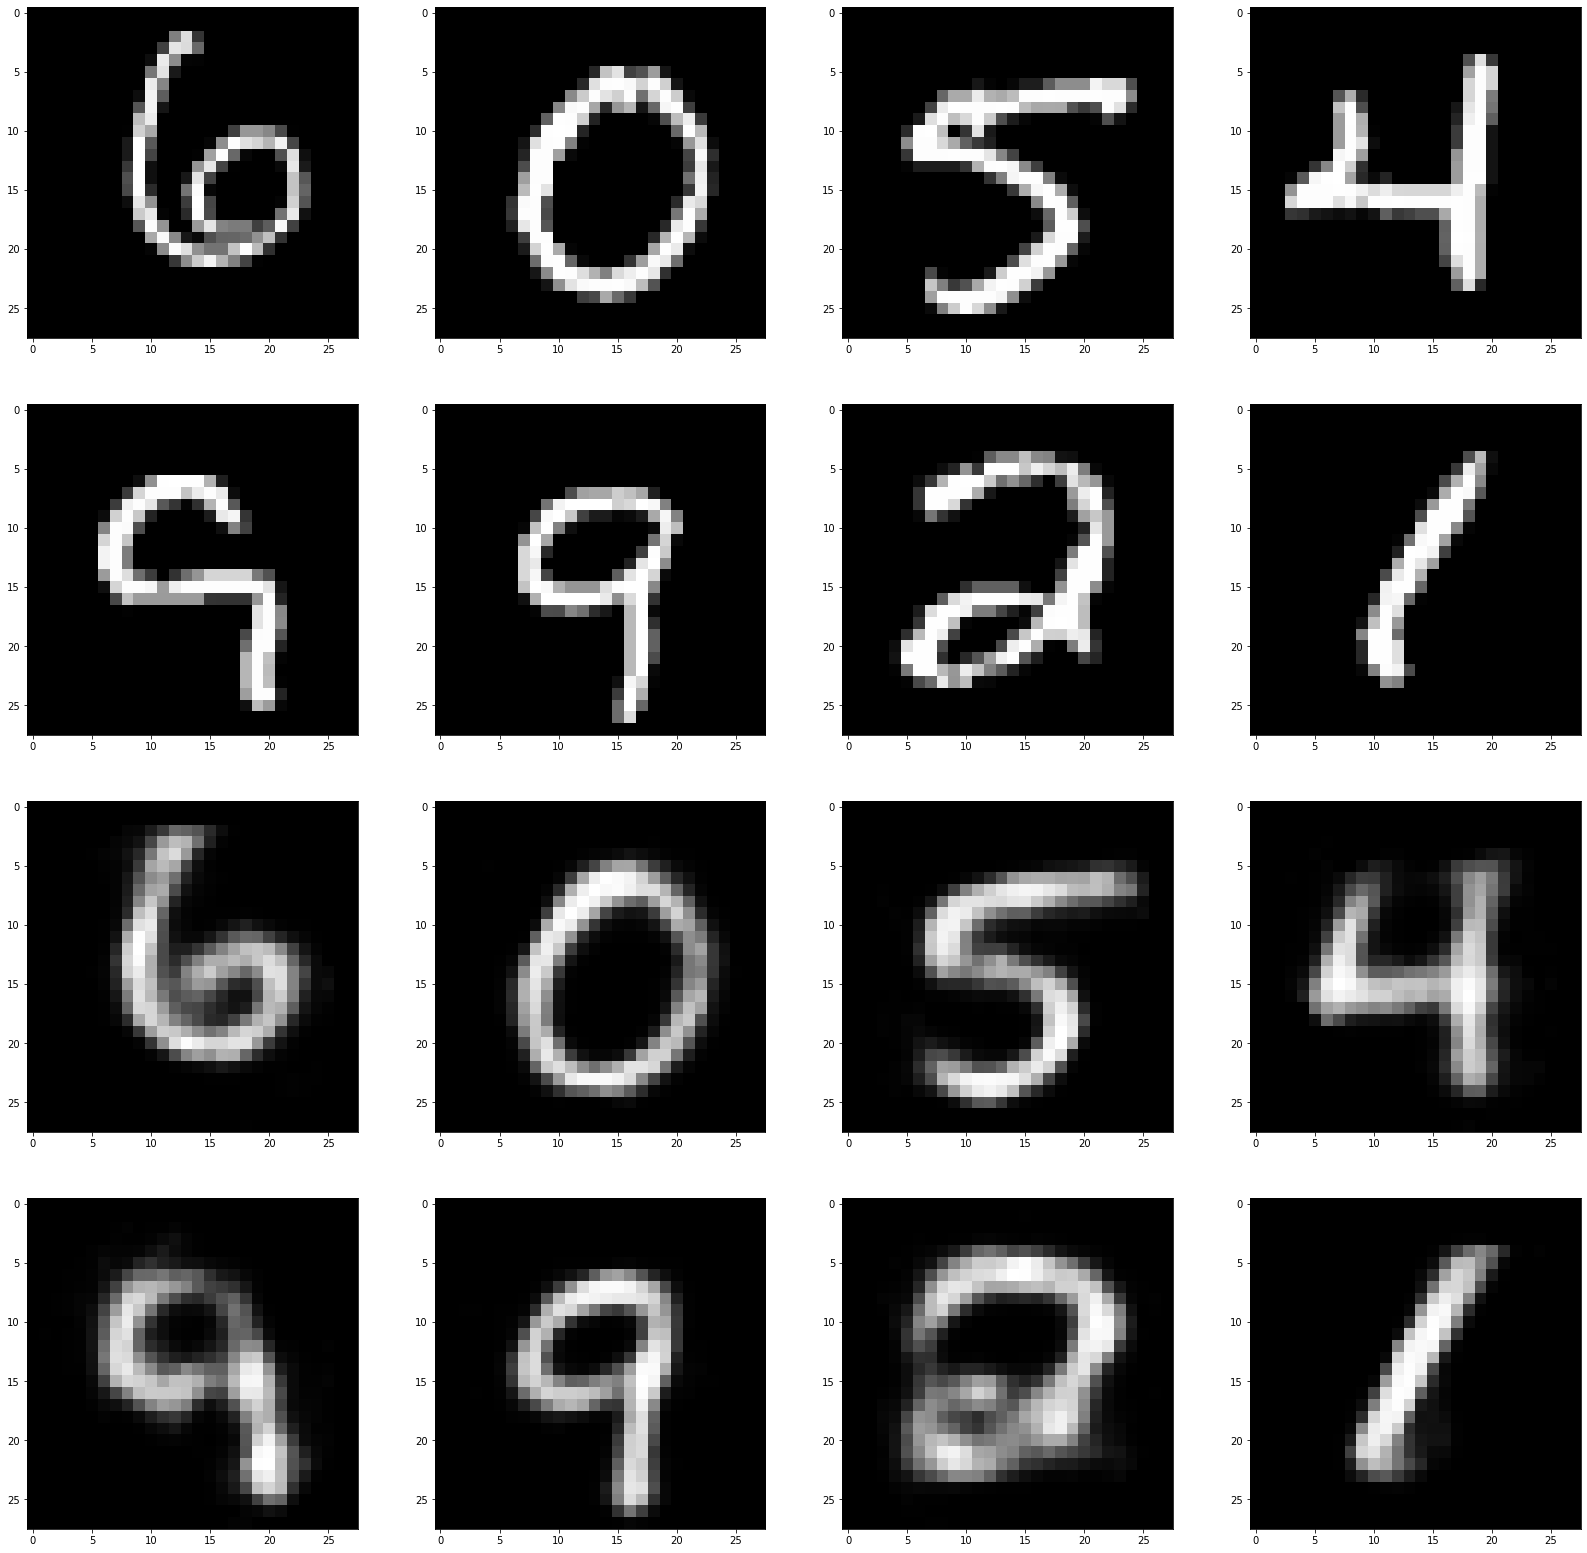

In [63]:
#sequential flow model:
inputs = keras.Input(shape = (784,))
x = inputs

#Regualr autoencoder

dense_1 = Dense(128, activation='sigmoid', input_shape=(784,))
dense_2 = Dense(50, activation = 'sigmoid')
dense_3 = Dense(20, activation='sigmoid')

x_input_hidden = dense_1(x)
x_input_embedding = dense_2(x_input_hidden)
center_layer = dense_3(x_input_embedding)
x_output_embedding = DenseTranspose(dense_3, activation="sigmoid")(center_layer)
x_output_hidden = DenseTranspose(dense_2, activation="sigmoid")(x_output_embedding)
x_output = DenseTranspose(dense_1, activation="sigmoid")(x_output_hidden)


# we instantiate our model

outputs = x_output

autoencoder = keras.Model(inputs=inputs, outputs=outputs)

print("\nTraining autoencoder")
autoencoder.compile(optimizer=keras.optimizers.Adam(lr=lr), loss = 'MSE', metrics = ['accuracy'])
autoencoder.summary()

history = autoencoder.fit(training_images[:60000], training_images[:60000], epochs=10, batch_size=batch_size)

auto_image = autoencoder.predict(test_images)
auto_image = np.array(auto_image, dtype='float')

fig = plt.figure(figsize=(28, 28))
for i in range(1, 9):
    # Adding test images to plot
    first_image = test_images[i+100-1]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    fig.add_subplot(4, 4, i)
    plt.imshow(pixels, cmap='gray')

for i in range(9, 17):
    # Now adding autoencoder's attempt at recreating test image to the plot
    pixels_predict = auto_image[i+100-9].reshape((28, 28))
    fig.add_subplot(4, 4, i)
    plt.imshow(pixels_predict, cmap='gray')

print("Epochs: " + str(epochs))
print("Batch Size: " + str(batch_size))
print("Learning Rate: " + str(lr))
plt.show()